## **Authors**

*The work can be done in groups of up to 3 students. Please complete the following fields with your group number and list your names along with ISU ID numbers.*

> **Technical Vision**
>
> 1. Кормушкина Ксения, 466278
> 2. Носуленко Егор, 466921

*The task and guidelines were prepared by Andrei Zhdanov and Sergei Shavetov, ITMO University, 2025.*

# **Practical Assignment No 1. Histograms, Profiles, Projections**

*Digital images basic brightness and geometric characteristics studying and using it for image analysis.*

*Изучение базовых яркостных и геометрических характеристик цифровых изображений и их использование для анализа изображений.*

## Introduction

A digital image pixel is characterized by three parameters: $(x, y, I)$, where a pair of integer values $x, y$ describes the geometric position of the pixel in the image plane, and the $I$ value characterizes its brightness (intensity) at a point on the plane. Thus, the brightness and geometric components can be distinguished in the image.  In the general case, these components are not related to each other (for example, a change scene illumination will not change the geometric parameters of objects on the scene).  Because of this, it is easier to investigate the image brightness properties and the geometric ones separately. This approach reduces the studied image order in the case of geometric properties from  $n = 3$ $(x, y, I)$ to $n = 2$ $(x, y)$, and in the brightness properties case to $n=1$ $(I)$. The image brightness component is characterized by a one-dimensional histogram array, from which the contrast can be calculated.

- **Histogram** is an occurrence frequency distribution of the same brightness pixels in the image.

- **Brightness** is an average signal intensity.

- **Contrast** is the values interval between the minimum and maximum image brightness.

To reduce the image geometric components to a one-dimensional data array $n = 1$ are used such characteristics as images "*profiles*" and "*projections*".

- **Profile** along the line is an intensity function of the image, distributed along this line.  

- **Projection** on the axis is a sum pixels intensities of the image, taken in the direction perpendicular to this axis.

=========================================================================================================================================

Пиксель цифрового изображения характеризуется тремя параметрами: $(x, y, I)$, где пара целых чисел $x, y$ описывает геометрическое положение пикселя в плоскости изображения, а значение $I$ характеризует его яркость (интенсивность) в точке на плоскости. Таким образом, в изображении можно выделить яркостную и геометрическую составляющие. В общем случае эти составляющие не связаны друг с другом (например, изменение освещения сцены не изменит геометрические параметры объектов на сцене). Из-за этого исследовать яркостные свойства изображения и геометрические свойства удобнее по отдельности. Такой подход снижает порядок изучаемого изображения в случае геометрических свойств с $n = 3$ $(x, y, I)$ до $n = 2$ $(x, y)$, а в случае яркостных свойств до $n=1$ $(I)$. Яркостная составляющая изображения характеризуется одномерным массивом гистограммы, из которого можно вычислить контраст.

Гистограмма — это распределение частоты встречаемости пикселей одинаковой яркости в изображении.

Яркость — это средняя интенсивность сигнала.

Контраст — это интервал значений между минимальной и максимальной яркостью изображения.

Для приведения геометрических составляющих изображения к одномерному массиву данных $n = 1$ используются такие характеристики, как "профили" и "проекции" изображений.

Профиль вдоль линии — это функция интенсивности изображения, распределенная вдоль этой линии.

Проекция на ось — это сумма интенсивностей пикселей изображения, взятая в направлении, перпендикулярном этой оси.


## Task 1. Histograms

*Select an arbitrary low-contrast image. Perform histogram alignment and contrast stretching, use the considered transformations and built-in OpenCV functions. Compare the results.*

=========================================================================================================================================

Выберите произвольное низкоконтрастное изображение. Выполните эквализацию гистограммы и растяжение контраста, используя рассмотренные преобразования и встроенные функции OpenCV. Сравните результаты.

For an 8-bit grayscale image the histogram is a one-dimensional integer array $hist$ of 256 elements $[0 \dots 255]$. The histogram element $hist[i]$  is the image pixels sum with the brightness $i$. Using the visual form of the histogram we can assess the need to change the image brightness and contrast, estimate the area occupied by light and dark elements, determine the location on the image plane of individual objects corresponding to brightness certain ranges. For a RGB color image it is need to create three histograms for each color.

If the histogram is uneven for the image improving it can be equalized. Histogram equalization depending on the problem being solved can be performed in different ways.

=========================================================================================================================================

Для 8-битного полутонового изображения гистограмма представляет собой одномерный целочисленный массив $hist$ из 256 элементов $[0 \dots 255]$. Элемент гистограммы $hist[i]$ — это сумма пикселей изображения с яркостью $i$. Используя визуальную форму гистограммы, мы можем оценить необходимость изменения яркости и контраста изображения, оценить площадь, занимаемую светлыми и темными элементами, определить местоположение на плоскости изображения отдельных объектов, соответствующих определенным диапазонам яркости. Для цветного изображения RGB необходимо создать три гистограммы для каждого цвета.

Если гистограмма неравномерна, для улучшения изображения ее можно эквализировать. Эквализация гистограммы в зависимости от решаемой задачи может выполняться разными способами.

At first, we will try calculating and displaying the histogram. To do it we have to:

1. Read an image from file
2. Process an image to calculate its histogram. If image consists of several color layers (e.g., *red*, *green* and *blue*) then we have to split it into layers first and then calculate histograms for each layer independently.
3. Creare new image canvas and draw a histogram on it.
4. Display the histogram. Also we may display an image aside.

So, let's do it.

=========================================================================================================================================

Сначала мы попробуем вычислить и отобразить гистограмму. Для этого нам нужно:

1. Прочитать изображение из файла

2. Обработать изображение для вычисления его гистограммы. Если изображение состоит из нескольких цветовых слоев (например, красного, зеленого и синего), то сначала нужно разделить его на слои, а затем вычислить гистограммы для каждого слоя независимо.

3. Создать новое полотно изображения и нарисовать на нем гистограмму.

4. Отобразить гистограмму. Также мы можем отобразить исходное изображение рядом.

Итак, давайте сделаем это.

### 1.1 Preparation

First, we need to add some imports for OpenCV to work correctly.

=========================================================================================================================================

Сначала нам нужно добавить несколько импортов для корректной работы OpenCV.

In [5]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import sys

/home/asus-ubuntu/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


### 1.2 Read image

Now let's open our image which we will use during the current task. We will open it both in GBR and in BW modes. We can do it by loading image directly in BRG or GRAYSCALE by setting the corresponding image read options, or convert BGR image to grayscale by calling `cvtColor(I, cv2.COLOR_BGR2GREY)` funtion. We will use both ways to see the difference. 

=========================================================================================================================================

Теперь откроем наше изображение, которое мы будем использовать в текущем задании. Мы откроем его как в режиме GBR, так и в режиме BW. Мы можем сделать это, загрузив изображение непосредственно в режиме BRG или GRAYSCALE, установив соответствующие параметры чтения изображения, или преобразовать изображение BGR в оттенки серого, вызвав функцию cvtColor(I, cv2.COLOR_BGR2GREY). Мы используем оба способа, чтобы увидеть разницу.

In [6]:
# Read an image from file in BGR
fn = "images/lena_color.png"
I = cv.imread(fn, cv.IMREAD_COLOR)
if not isinstance(I, np.ndarray) or I.data == None:
  print("Error reading file \"{}\"".format(fn))
else:
  # Convert loaded BGR image to grayscale
  Igray = cv.cvtColor(I, cv.COLOR_BGR2GRAY)

# Read an image from file in grayscale
Igray_2 = cv.imread(fn, cv.IMREAD_GRAYSCALE)
if not isinstance(Igray_2, np.ndarray) or Igray_2.data == None:
  print("Error reading file \"{}\"".format(fn))


### 1.3 Display image

As we currently use the Jupiter Notebook, we can't use OpenCV `imshow()` function, so we will use `matplotlib.pyplot.imshow`. Since OpenCV uses BGR and pyplot uses RGB, so we have to add color model conversion with `cvtColor(I, cv2.COLOR_BGR2RGB)` funtion. 
To display several images side-by-side we will use subplots function and set it two have two columns and one row of plots. Let's create a function which we will use to display one or several OpenCV images side-by-side. It will take an array of tuples with image and its name as an argument and number of images in a single row.

=========================================================================================================================================

Поскольку мы сейчас используем Jupyter Notebook, мы не можем использовать функцию OpenCV imshow(), поэтому мы будем использовать matplotlib.pyplot.imshow. Так как OpenCV использует BGR, а pyplot использует RGB, нам нужно добавить преобразование цветовой модели с помощью функции cvtColor(I, cv2.COLOR_BGR2RGB).
Для отображения нескольких изображений рядом мы будем использовать функцию subplots и установим для нее два столбца и один ряд графиков. Давайте создадим функцию, которую будем использовать для отображения одного или нескольких изображений OpenCV рядом. Она будет принимать в качестве аргумента массив кортежей с изображением и его именем, а также количество изображений в одном ряду.

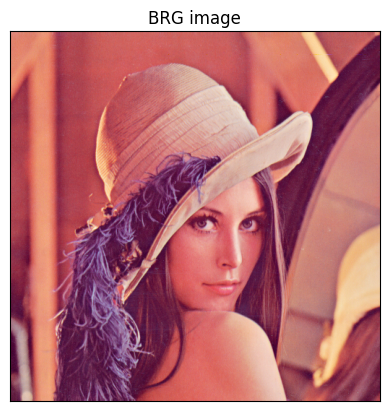

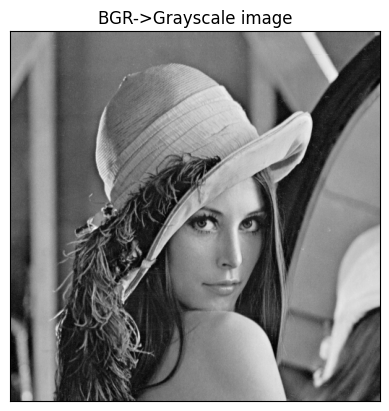

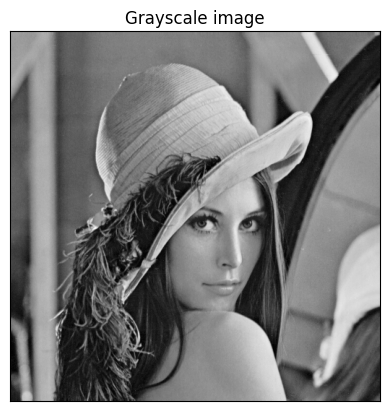

In [7]:
# Show image
# We can't run OpenCV imshow here as it will be displayed in separete window or simply crash our notebook
# cv.imshow("BRG image", I)
# cv.imshow("Grayscale image", Igray)
# So let's use another way

## Draw several images on a sigle plot side-by-side
## @param[in] Is tuples of image names and images to draw
## @param[in] ncols Number of culumns to use (0 to display them separately)
## @param[in] hide_axes If hide axes for a better view
def ShowImages(Is, ncols = 0, hide_axes = True):
  if len(Is) == 0:
    return
  
  # Show images one-by-one
  if len(Is) == 1 or ncols == 0:
    for I in Is:
      if I == None:
        continue

      if I[1].ndim == 2:
        axes = plt.imshow(I[1], cmap='gray')
      else:
        axes = plt.imshow(cv.cvtColor(I[1], cv.COLOR_BGR2RGB))
      plt.title(I[0])

      # If we don't need axes display, then let's hide it
      if hide_axes:
        axes.axes.get_xaxis().set_visible(False)
        axes.axes.get_yaxis().set_visible(False)
      
      # And now show image
      plt.show()
    return

  # Show images side-by-side
  fig, axes = plt.subplots(nrows = (len(Is) + ncols - 1) // ncols, ncols = ncols)
  axes = axes.flatten()
  for i in range(len(Is)):
    if Is[i] != None:
      if Is[i][1].ndim == 2:
        axes[i].imshow(Is[i][1], cmap='gray')
      else:
        axes[i].imshow(cv.cvtColor(Is[i][1], cv.COLOR_BGR2RGB))
      axes[i].set_title(Is[i][0])

    # If we don't need axes display, then let's hide it
    if hide_axes:
      axes[i].axes.get_xaxis().set_visible(False)
      axes[i].axes.get_yaxis().set_visible(False)
  
  for i in range(len(Is), ncols * ((len(Is) + ncols - 1) // ncols)):
    axes[i].set_visible(False)

  # And now show image
  plt.show()

# Now we can use this function to display two images
ShowImages([("BRG image", I), 
            ("BGR->Grayscale image", Igray), 
            ("Grayscale image", Igray_2)], 0, True)

### 1.4 Display image histogram

Now we can display the images histograms in RGB and in BW. For first this we will add functions to draw histograms and graphs in OpenCL image.

=========================================================================================================================================

Теперь мы можем отобразить гистограммы изображений в RGB и в BW. Для этого сначала добавим функции для рисования гистограмм и графиков в изображении OpenCV.

In [ ]:
## Draw a histogram in a given image drawing context
## @param[in, out] image image drawing context
## @param[in] data_array data to draw
## @param[in] color color to use when drawing
## @param[in] max_val scale factor for the histogram values (default is 1)
def DrawHist(image, data_array, color, max_val = 1.0):
  image_w = image.shape[1]
  image_h = image.shape[0]
  data_size = data_array.shape[0]

  step = image_w / data_size
  x = 0
  for i in range(0, data_size):
    cv.rectangle(image, 
                 (int(x), image_h - 1 - int((image_h - 1) * data_array[i] / max_val)),
                 (int(x + step) - 1, image_h - 1),
                 color, thickness = -1)
    x += step

## Draw a plot in a given image drawing context
## @param[in, out] image image drawing context
## @param[in] data_array data to draw
## @param[in] color color to use when drawing
## @param[in] max_val scale factor for the histogram values (default is 1)
def DrawGraph(image, data_array, color, max_val = 1.0):
  image_w = image.shape[1]
  image_h = image.shape[0]
  data_size = data_array.shape[0]

  step = image_w / data_size
  x = step * 0.5
  cv.line(image, 
          (0, image_h - 1 - int((image_h - 1) * data_array[0] / max_val)),
          (int(x), image_h - 1 - int((image_h - 1) * data_array[0] / max_val)),
          color, thickness = 1)

  for i in range(1, data_size):
    cv.line(image, 
            (int(x), image_h - 1 - int((image_h - 1) * data_array[i - 1] / max_val)),
            (int(x + step), image_h - 1 - int((image_h - 1) * data_array[i] / max_val)),
            color, thickness = 1)
    x += step

  cv.line(image, 
          (int(x), image_h - 1 - int((image_h - 1) * data_array[data_size - 1] / max_val)),
          (image_w - 1, image_h - 1 - int((image_h - 1) * data_array[data_size - 1] / max_val)),
          color, thickness = 1)

Now we can use `cv.calcHist()` function to calculate image histogram, then display it using our `DrawHist()` for BW image and `DrawGraph()` for BRG one. Then we can use `ShowImages()` functions to show results.

=========================================================================================================================================

Теперь мы можем использовать функцию cv.calcHist() для вычисления гистограммы изображения, затем отобразить ее с помощью нашей функции DrawHist() для изображения BW и DrawGraph() для изображения BRG. Затем мы можем использовать функцию ShowImages() для отображения результатов.

In [ ]:
## Create an image with histogrm
## @param[in] I An image to work with
## @return An image with histogram
def SimpleHistogram(I):
  if I.ndim == 2:
    # If we have a grayscale image we have single histogram
    # Calculate histogram
    hist = cv.calcHist([I], [0], None, [256], [0, 256])[:, 0]
    # Alternatively we can use numpy histogram function to do same
    # (hist, tmp) = np.histogram(img.ravel(), 256, [0, 256])

    # Now we need to allocate an image and draw on it with DrawHist function
    hist_img = np.full((256, 512, 3), 255, dtype = np.uint8)
    DrawHist(hist_img, hist, (127, 127, 127), hist.max())
  else:
    # Split an image into layers and work with them separately
    bgr_planes = cv.split(I)

    # Calculate histogram
    hist_b = cv.calcHist(bgr_planes, [0], None, [256], [0, 256])[:, 0]
    hist_g = cv.calcHist(bgr_planes, [1], None, [256], [0, 256])[:, 0]
    hist_r = cv.calcHist(bgr_planes, [2], None, [256], [0, 256])[:, 0]

    # Draw histogram
    hist_img = np.full((256, 512, 3), 255, dtype = np.uint8)
    hist_scale = np.max([hist_b.max(), hist_g.max(), hist_r.max()])
    DrawGraph(hist_img, hist_b, (255, 0, 0), hist_scale)
    DrawGraph(hist_img, hist_g, (0, 255, 0), hist_scale)
    DrawGraph(hist_img, hist_r, (0, 0, 255), hist_scale)

  return hist_img

# Now let's show histograms
ShowImages([("Histogram BGR", SimpleHistogram(I)), 
            ("Histogram BGR->grayscale", SimpleHistogram(Igray)), 
            ("Histogram grayscale", SimpleHistogram(Igray_2))])

From now on we will work with grayscale images as our task is to work with image intensities.

Now let's add the cummulative histogram calculation. To calculate it we will use numpy `cumsum()` function.

=========================================================================================================================================

С этого момента мы будем работать с полутоновыми изображениями, так как наша задача — работать с интенсивностями изображения.

Теперь добавим вычисление кумулятивной гистограммы. Для ее вычисления мы будем использовать функцию numpy cumsum().

In [ ]:
## Create an image with histogrm and cummulative histogram
## @param[in] I An image to work with
## @return An image with histogram
def Histogram(I):
  # Only grayscale images are considered
  if I.ndim != 2:
    return None
  
  # Calculate histogram
  hist = cv.calcHist([I], [0], None, [256], [0, 256])[:, 0]

  # Calculate cumulative histogram
  cum_hist = np.cumsum(hist) / I.shape[0] / I.shape[1]

  # Now we need to allocate an image and draw on it with DrawHist function
  hist_img = np.full((256, 512, 3), 255, dtype = np.uint8)
  DrawHist(hist_img, hist, (127, 127, 127), hist.max())
  DrawGraph(hist_img, cum_hist, (0, 0, 0), 1)

  return hist_img

# Now let's show histograms
ShowImages([("Histogram", Histogram(Igray))])

---
> ***Self-work***
>
> Take some arbitrary image and display its histogram both in RGB and in grayscale color models.
---

Самостоятельная работа

Возьмите произвольное изображение и отобразите его гистограмму как в цветовой модели RGB, так и в градациях серого.

In [ ]:
# TODO Place your solution here


### 1.5 Histogram transformations
Now we are ready to try different histogram transformations.

=========================================================================================================================================

Теперь мы готовы попробовать различные преобразования гистограмм.

#### 1.5.1 Shift

The simplest ways for histogram equalization are $\textit{arithmetic operations}$ on images. For example, if most of the histogram values are on the left, then the image is dark. To increase the detail in dark areas, it is need to shift the histogram to the right lighter area, for example, by 50 gradations for each color.

So, let's try shifting histogram by 50 to the right. Just add 50 to the image:

$$I_{shift} = I + 50$$

=========================================================================================================================================

Простейшими способами эквализации гистограммы являются арифметические операции над изображениями. Например, если большинство значений гистограммы находятся слева, то изображение темное. Чтобы увеличить детализацию в темных областях, необходимо сдвинуть гистограмму вправо, в более светлую область, например, на 50 градаций для каждого цвета.

Итак, давайте попробуем сдвинуть гистограмму на 50 вправо. Просто добавим 50 к изображению:

$$I_{shift} = I + 50$$

In [ ]:
## Shift image histogram by n
## @param[in] I An image to work with
## @param[in] n A value to shift with
## @return An image after shift
def Shift(I, n):
  return I + n

# Apply it
Ishift = Shift(Igray, 50)
ShowImages([("Source image", Igray), ("Shift by 50", Ishift)])

# Let's also show histograms before and after to compare
ShowImages([("Histogram before", Histogram(Igray)), 
            ("Histogram after Shift", Histogram(Ishift))], 0)

We got quite strange result. The reason is that we forgot about clipping image colors during transformation and get `uint8` color overflow. We should correct it by adding working in `int32` and adding clip before converting back to `uint8`.

$$I_{shift}[x](val) = \begin{cases}
   0          &\text{if } I[x] + val < 0 \\
   I[x] + val &\text{if } 0 <= I[x] + val <= 255 \\
   255        &\text{if } I[x] + val > 255
\end{cases}$$

In [ ]:
## Shift image histogram by n and clip to [0, 255] range
## @param[in] I An image to work with
## @param[in] n A value to shift with
## @return An image after shift and clip
def ShiftAndClip(I, n):
  return (I.astype(np.int32) + 50).clip(0, 255).astype(np.uint8)

# Nnow we can apply it
Ishiftclip = ShiftAndClip(Igray, 50)
ShowImages([("Shift by 50 and clip", Ishiftclip)])

# Let's also show histograms before and after to compare
ShowImages([("Histogram before", Histogram(Igray)), 
            ("Histogram after Shift", Histogram(Ishift)), 
            ("Histogram after Shift and Clip", Histogram(Ishiftclip))], 0)

Now let's try applying some more histogram transformations.
We will apply histogram transformations with lookup tables and OpenCV `LUT()` function. So our goal is to fill the lookup table for each transformation.

#### 1.5.1.2 Linear transformation

First we will try do linear transformation and apply it as a LUT. We already know about clipping, so we will use it here as well. Our lookup table will have a form of

$$LUT(x) = a \cdot x + b$$

In [ ]:
## Create a lookup table for the linear transformation with a * x + b formula
## @param[in] a First parameter
## @param[in] b Second parameter
## @return The lookup table for the linear tansformation
def Linear(a = 1, b = 0):
  # Fill lut with values from 0 to 255  
  lut = np.arange(256, dtype = np.int32)
  # Apply formula
  lut = lut * a + b
  # Clip and convert to uint8
  return lut.clip(0, 255).astype(np.uint8)

# Now we can apply it
Ilinear = cv.LUT(Igray, Linear(1, 0))
ShowImages([("Source image", Igray), 
            ("Linear transformation", Ilinear)])

# Let's also show histograms before and after to compare
ShowImages([("Histogram before", Histogram(Igray)), 
            ("Histogram after Linear transformation", Histogram(Ilinear))], 0)

#### 1.5.1.3 Linear equalization

Now let's do the linear equalization. For this transformation we need to calculate the cummulative histogram and use it as a LUT, so the source image will be a parameter for the our `LinearEuqalization` function. So

$$LUT(x) = P(x) \cdot 255$$

where $P(x)$ is the cummulative histogram of an image.

In [ ]:
## Create a lookup table for the linear equalization for a given image
## @param[in] I Image to work with
## @return The lookup table for the linear equalization
def LinearEqualization(I):
  # Calculate the cummulative histogram
  hist = cv.calcHist([Igray], [0], None, [256], [0, 256])[:, 0]
  P = cum_hist = np.cumsum(hist) / Igray.shape[0] / Igray.shape[1]

  # Fill lut scaled cummulative histogram values
  lut = 255 * P
  # Clip and convert to uint8
  return lut.clip(0, 255).astype(np.uint8)

# Now we can apply it
Ilineareq = cv.LUT(Igray, LinearEqualization(I))
ShowImages([("Source image", Igray), 
            ("Linear equalzation", Ilineareq)])

# Let's also show histograms before and after to compare
ShowImages([("Histogram before", Histogram(Igray)), 
            ("Histogram after Linear equalization", Histogram(Ilineareq))], 0)

#### 1.5.2 Nonlinear dynamic range stretching

In this case we will stretch the narrow range to a whole range using formula

В этом случае мы растянем узкий диапазон на весь диапазон, используя формулу

$$lut_{[0,1]}(x) = \left( \dfrac{x - I_{min}}{I_{max} - I_{min}} \right) ^ \alpha$$

where $\alpha$ is a parameter of the nonlinear dynamic range stretching function, while $I_{min}$ and $I_{max}$ are minimum and maxiumum image intensity values correspondingly. This formula works in [0, 1] range, so we have to multiply it by 255 to get it to a range we use in our images as otherwise will get a [0, 1] floating point value range:

где $\alpha$ — параметр функции нелинейного растяжения динамического диапазона, а $I_{min}$ и $I_{max}$ — соответственно минимальное и максимальное значения интенсивности изображения. Эта формула работает в диапазоне [0, 1], поэтому мы должны умножить её на 255, чтобы привести её к диапазону, который мы используем в наших изображениях, иначе мы получим диапазон значений с плавающей точкой [0, 1]:

$$lut_{[0,255]}(x) = \left( \dfrac{x - I_{min}}{I_{max} - I_{min}} \right) ^ \alpha \cdot 255$$

*Please note that the fraction under power operation can become negative, so this should be correctly handled, for example, by using* `numpy.maximum(lut, 0)` *function.*

Обратите внимание, что дробь под возведением в степень может стать отрицательной, поэтому это должно быть правильно обработано, например, с помощью функции numpy.maximum(lut, 0).

In [ ]:
## Create a lookup table for the nonlinear dynamic range stretching for a given image
## @param[in] I Image to work with
## @param[in] alpha Function parameter
## @return The lookup table for the linear equalization
def NonlinearDynamicRangeStretching(I, alpha):
  # Calculate minimum and maximum image intensity values
  Imin = I.min()
  Imax = I.max()

  # Fill lut with values from 0 to 255  
  lut = np.arange(256, dtype = np.float32)
  # Apply formula
  lut = np.power(np.maximum(((lut - Imin) / (Imax - Imin)), 0), alpha) * 255
  # Clip and convert to uint8
  return lut.clip(0, 255).astype(np.uint8)

# Now we can apply it
Inldrs = cv.LUT(Igray, NonlinearDynamicRangeStretching(I, 0.7))
ShowImages([("Source image", Igray), 
            ("Nonlinear dynamic range stretching", Inldrs)])

# Let's also show histograms before and after to compare
ShowImages([("Histogram before", Histogram(Igray)), 
            ("Histogram after Nonlinear dynamic range stretching", Histogram(Inldrs))], 0)

#### 1.5.3 Uniform transformation

The uniform transformation is carried out according to the formula

Равномерное преобразование выполняется по формуле

$$LUT(x) = (I_{max} - I_{min}) \cdot P(x) + I_{min}$$

where $P(x)$ is the image cummulative histogram, while $I_{min}$ and $I_{max}$ are minimum and maxiumum image intensity values correspondingly. Note that cummulative histogram is a floating point value function (array), so calculations should be done with floating point and then converted to a `uint8` range. 

где $P(x)$ — кумулятивная гистограмма изображения, а $I_{min}$ и $I_{max}$ — соответственно минимальное и максимальное значения интенсивности изображения. Обратите внимание, что кумулятивная гистограмма — это функция (массив) с плавающей точкой, поэтому вычисления должны выполняться с плавающей точкой, а затем преобразовываться в диапазон uint8.

In [ ]:
## Create a lookup table for the uniform transformation for a given image
## @param[in] I Image to work with
## @return The lookup table for the linear equalization
def UniformTransformation(I):
  # Calculate minimum and maximum image intensity values
  Imin = I.min()
  Imax = I.max()

  # Calculate the cummulative histogram
  hist = cv.calcHist([Igray], [0], None, [256], [0, 256])[:, 0]
  P = cum_hist = np.cumsum(hist) / Igray.shape[0] / Igray.shape[1]

  # Apply formula
  lut = (Imax - Imin) * P + Imin
  # Clip and convert to uint8
  return lut.clip(0, 255).astype(np.uint8)

# Now we can apply it
Iuniform = cv.LUT(Igray, UniformTransformation(I))
ShowImages([("Source image", Igray), ("Uniform transformation", Iuniform)])

# Let's also show histograms before and after to compare
ShowImages([("Histogram before", Histogram(Igray)), ("Histogram after Uniform transformation", Histogram(Iuniform))], 0)

#### 1.5.4 Exponential transformation

The exponential transformation is carried out according to the formula

Экспоненциальное преобразование выполняется по формуле

$$LUT_{[0,1]}(x) = I_{min} - \dfrac{1}{\alpha} \cdot \ln\left(1-P(x)\right)$$

where $I_{min}$ is minimum image intensity value and $P(x)$ is image cummulative histogram. 

где $I_{min}$ — минимальное значение интенсивности изображения, а $P(x)$ — кумулятивная гистограмма изображения.

This formula works in [0, 1] floating point values range, so we have to change it by dividing $I_{min}$  by $255$ and then converting back to [0, 255] by adding multiplication of the result by $255$:

Эта формула работает в диапазоне значений с плавающей точкой [0, 1], поэтому мы должны изменить её, разделив $I_{min}$ на $255$, а затем преобразовать обратно в диапазон [0, 255], добавив умножение результата на $255$:

$$LUT_{[0,255]}(x) = \left( \dfrac{I_{min}}{255.0} - \dfrac{1}{\alpha} \cdot \ln\left(1-P(x)\right) \right) \cdot 255$$

*To avoid division by zero in formula implementation you may add epsilon clipping by using* `np.maximum(1 - P, sys.float_info.epsilon)` *function.*

Чтобы избежать деления на ноль в реализации формулы, вы можете добавить отсечение эпсилон, используя функцию np.maximum(1 - P, sys.float_info.epsilon).

---
> ***Self-work***
>
> Finish the implementation of the exponential transformation.
>
> Завершите реализацию экспоненциального преобразования.
---

In [ ]:
## Create a lookup table for the exponential transformation for a given image
## @param[in] I Image to work with
## @param[in] alpha Transofmration parameter
## @return The lookup table for the exponential equalization
def ExponentialTransformation(I, alpha):
  # TODO Place your solution here
  pass

  # TODO Place your solution here


#### 1.5.5 Rayleigh transformation

The Rayleigh transformation is carried out according to the formula

Преобразование Рэлея выполняется по формуле

$$LUT_{[0,1]}(x) = I_{min}+\sqrt{2\alpha^2 \ln\left(\dfrac1{1-P(x)}\right)}$$

where $I_{min}$ is minimum image intensity value, $P(x)$ is image cummulative histogram, and  $\alpha$ is constant characterizing the histogram of the resulting image elements intensity distribution.

где $I_{min}$ — минимальное значение интенсивности изображения, $P(x)$ — кумулятивная гистограмма изображения, а $\alpha$ — константа, характеризующая гистограмму распределения интенсивности элементов результирующего изображения.

This formula works in [0, 1] floating point values range, so we have to convert our source $I_{min}$ to it by dividing $I_{min}$ by $255$ and then converting back to [0, 255] by adding multiplication of the result by $255$:

Эта формула работает в диапазоне значений с плавающей точкой [0, 1], поэтому мы должны преобразовать наш исходный $I_{min}$ в него, разделив $I_{min}$ на $255$, а затем преобразовать обратно в диапазон [0, 255], добавив умножение результата на $255$:

$$LUT_{[0,255]}(x) = \left(\dfrac{I_{min}}{255.0}+\sqrt{2\alpha^2 \ln\left(\dfrac1{1-P(x)}\right)}\right) \cdot 255$$

*To avoid division by zero in formula implementation you may add epsilon clipping by using* `np.maximum(1 - P, sys.float_info.epsilon)` *function.*

Чтобы избежать деления на ноль в реализации формулы, вы можете добавить отсечение эпсилон, используя функцию np.maximum(1 - P, sys.float_info.epsilon).

---
> ***Self-work***
>
> Finish the implementation of the Rayleigh transformation.
>
>Завершите реализацию преобразования Рэлея.
---

In [ ]:
## Create a lookup table for the Rayleigh transformation for a given image
## @param[in] I Image to work with
## @param[in] alpha Transofmration parameter
## @return The lookup table for the exponential equalization
def RayleighTransformation(I, alpha):
  # TODO Place your solution here
  pass

  # TODO Place your solution here


#### 1.5.6 2/3 degree transformation

The 2/3 degree transformation is carried out according to the formula

Преобразование степени 2/3 выполняется по формуле

$$LUT_{[0,1]}(x) = P(x)^{2/3}$$

where $P(x)$ is image cummulative histogram.

где $P(x)$ — кумулятивная гистограмма изображения.

This formula works in [0, 1] floating point values range, so we have to convert it to [0, 255] range by adding multiplication of the result by $255$:

Эта формула работает в диапазоне значений с плавающей точкой [0, 1], поэтому мы должны преобразовать её в диапазон [0, 255], добавив умножение результата на $255$:

$$LUT_{[0,255]}(x) = P(x)^{2/3} \cdot 255$$

*To avoid division by zero in formula implementation you may add epsilon clipping by using* `np.maximum(1 - P, sys.float_info.epsilon)` *function.*

Чтобы избежать деления на ноль в реализации формулы, вы можете добавить отсечение эпсилон, используя функцию np.maximum(1 - P, sys.float_info.epsilon).

---
> ***Self-work***
>
> Finish the implementation of the 2/3 degree transformation.
---

In [ ]:
## Create a lookup table for the 2/3 degree transformation for a given image
## @param[in] I Image to work with
## @return The lookup table for the exponential equalization
def TwoThirdDegreeTransformation(I):
  # TODO Place your solution here
  pass

  # TODO Place your solution here


#### 1.5.7 Hyperbolic transformation

The hyperbolic transformation is carried out according to the formula

Гиперболическое преобразование выполняется по формуле

$$LUT_{[0,1]}(x) = \alpha^{P(x)}$$

where $P(x)$ is image cummulative histogram.

где $P(x)$ — кумулятивная гистограмма изображения.

This formula works in [0, 1] floating point values range, so we have to convert it to [0, 255] range by adding multiplication of the result by $255$:

Эта формула работает в диапазоне значений с плавающей точкой [0, 1], поэтому мы должны преобразовать её в диапазон [0, 255], добавив умножение результата на $255$:

$$LUT_{[0,255]}(x) = \alpha^{P(x)} \cdot 255$$

---
> ***Self-work***
>
> Finish the implementation of the hyperbolic transformation.
---

In [ ]:
## Create a lookup table for the hyperbolic transformation for a given image
## @param[in] I Image to work with
## @param[in] alpha Transofmration parameter
## @return The lookup table for the exponential equalization
def HyperbolicTransformation(I, alpha):
  # TODO Place your solution here
  pass

  # TODO Place your solution here


### 1.6 OpenCV built-in transformations

OpenCV toolkit also provides some functions for automatic histogram equalization:
- `equalizeHist()` to enhance the image contrast using histogram equalization;
- `createCLAHE()` and `CLAHE.apply()` to enhance the contrast of the grayscale image by transforming the values using contrast-limited adaptive histogram equalization (CLAHE).

The same as in MATLAB, these functions can be applied only to a single color level of an image. So, in case if the color image is being processed then the equalization should be called for each layer separately.

Let's try using them and see the result.

Инструментарий OpenCV также предоставляет некоторые функции для автоматической эквализации гистограммы:

- equalizeHist() для улучшения контраста изображения с помощью эквализации гистограммы;

- createCLAHE() и CLAHE.apply() для улучшения контраста полутонового изображения путем преобразования значений с использованием адаптивной эквализации гистограммы с ограничением контраста (CLAHE).

Так же, как и в MATLAB, эти функции могут применяться только к одному цветовому каналу изображения. Таким образом, если обрабатывается цветное изображение, то эквализация должна вызываться для каждого слоя отдельно.

Давайте попробуем использовать их и посмотрим на результат.

#### 1.6.1 OpenCV built-in histogram equalization

It is executed by `equalizeHist()` method.

Она выполняется методом equalizeHist().

In [ ]:
# Run histogram euqalization and display images
Icveq = cv.equalizeHist(Igray)
ShowImages([("Source image", Igray), 
            ("OpenCV histogram equalization", Icveq)])

# Let's also show histograms before and after to compare
ShowImages([("Histogram before", Histogram(Igray)), 
            ("Histogram after OpenCV histogram equalization", Histogram(Icveq))], 0)

This seems familiar to us. Let's place our histogram equalization and OpenCV one side-by-side.

Это кажется нам знакомым. Давайте разместим нашу эквализацию гистограммы и эквализацию OpenCV рядом.



In [ ]:
ShowImages([("OpenCV", Icveq), 
            ("Our", Ilineareq)], 2)
ShowImages([("OpenCV", Histogram(Icveq)), 
            ("Our", Histogram(Ilineareq))], 2)

There is a little difference which can be explained by a bit different order of floating point operations resulting in a shift of some values.

Есть небольшое различие, которое можно объяснить немного другим порядком операций с плавающей точкой, приводящим к сдвигу некоторых значений.

---
> ***Self-work***
>
> Try running the same code for a different image. Does the result still match with two different implementations?
>
>Попробуйте запустить тот же код для другого изображения. Совпадает ли результат в двух разных реализациях?

---

In [ ]:
# TODO Place your solution here


#### 1.6.2 Adaptive histogram transformation

This transformation is executed with sliding window.

Это преобразование выполняется со скользящим окном.

In [ ]:
# Create CLAHE object and apply transformation
clahe = cv.createCLAHE()
clahe.setClipLimit(4)
clahe.setTilesGridSize((20, 20))
Iclahe = clahe.apply(Igray)
ShowImages([("Source image", Igray), 
            ("OpenCV CLAHE", Iclahe)])

# Let's also show histograms before and after to compare
ShowImages([("Histogram before", Histogram(Igray)), 
            ("Histogram after OpenCV CLAHE", Histogram(Iclahe))], 0)

## Task 2. Profiles

*Select an arbitrary image containing a barcode. Calculate an image profile along the barcode.*

Выберите произвольное изображение, содержащее штрих-код. Вычислите профиль изображения вдоль штрих-кода.

**Image profile** along an arbitrary line is the intensity function image which is distributed along this line. The simplest case of image profile is a row profile:

Профиль изображения вдоль произвольной линии — это функция интенсивности изображения, распределенная вдоль этой линии. Простейшим случаем профиля изображения является профиль строки:

$$profile(I, i, x)=I(x,i)$$

where $i$ is the row number of the image $I$.

где $i$ — номер строки изображения $I$.

Column profile is:

Профиль столбца:

$$profile(I, j, y)=I(j,y)$$

where $j$ is the column number of the image $I$.

где $j$ — номер столбца изображения $I$.

In general case, an image profile can be considered along arbitrary straight, poly or curved line intersects the image. After image profile array getting it can be analyzed using standard approaches. The analysis allows to automatically highlight the special points of the profile function corresponding to the image contours intersected by this line. For example, if we calculate the profile of the barcode image along the axis intersecting barcode lines, we can then process it to extract the information about lines thickness and easily calculate the barcode code value.

В общем случае профиль изображения может рассматриваться вдоль произвольной прямой, ломаной или кривой линии, пересекающей изображение. После получения массива профиля изображения его можно проанализировать с помощью стандартных подходов. Анализ позволяет автоматически выделить особые точки функции профиля, соответствующие контурам изображения, пересекаемым этой линией. Например, если мы вычислим профиль изображения штрих-кода вдоль оси, пересекающей линии штрих-кода, мы сможем затем обработать его, чтобы извлечь информацию о толщине линий и легко вычислить значение кода штрих-кода.

Let's calculate the profile in a simple way by slicing the image as an array. If we need a profile along arbitrary line then we can first rotate an image and then do a profile along new horizontal or vertical axis. We will learn how to rotate image later in this course.

Давайте вычислим профиль простым способом, нарезая изображение как массив. Если нам нужен профиль вдоль произвольной линии, мы можем сначала повернуть изображение, а затем сделать профиль вдоль новой горизонтальной или вертикальной оси. Мы узнаем, как поворачивать изображение, позже в этом курсе.

First, lest open an image with barcode.

Сначала откроем изображение со штрих-кодом.

In [ ]:
# Read image
fn_barcode = "images/barcode.png"
Icode = cv.imread(fn_barcode, cv.IMREAD_GRAYSCALE)
if not isinstance(Icode, np.ndarray) or Icode.data == None:
  print("Error reading file \"{}\"".format(fn))


Now let's do a slice right in the middle to get a barcode profile. Then we will display it.

Теперь давайте сделаем срез посередине, чтобы получить профиль штрих-кода. Затем мы его отобразим.

In [ ]:
offset = round(Icode.shape[0] / 2)
profile = Icode[offset, :]
Iprof = np.full((256, Icode.shape[1], 3), 255, dtype = np.uint8)
DrawGraph(Iprof, profile.astype(np.uint32), (0, 0, 0), profile.max())
ShowImages([("Image", Icode), 
            ("Profile", Iprof)], 0)

We can also cleanup this profile a little for easier processing by thresholding it.

Мы также можем немного очистить этот профиль для более легкой обработки, применив пороговое преобразование.

In [ ]:
mask = profile > 128
profile2 = np.zeros_like(profile)
profile2[mask] = 255
profile2[~mask] = 0
Iprof2 = np.full((256, Icode.shape[1], 3), 255, dtype = np.uint8)
DrawGraph(Iprof2, profile2.astype(np.uint32), (0, 0, 0), profile.max())
ShowImages([("Image", Icode), 
            ("Profile after cleanup", Iprof2)], 0)

---
> ***Self-work***
>
> Take some arbitrary barcode image and calculate the image profile.
>
>Возьмите произвольное изображение штрих-кода и вычислите профиль изображения.
---

In [ ]:
# TODO Place your solution here


## Task 3. Projections

*Select an arbitrary image containing monotone areas and prominent objects. Calculate image projections on the vertical and horizontal axes. Define the objects boundaries.*

Выберите произвольное изображение, содержащее однотонные области и выделяющиеся объекты. Вычислите проекции изображения на вертикальную и горизонтальную оси. Определите границы объектов.

To do this first we need to read and image.

Для этого сначала нужно прочитать изображение.

In [ ]:
# Read an image from file in grayscale
fn_proj = "images/text.png"
Iproj = cv.imread(fn_proj, cv.IMREAD_GRAYSCALE)
if not isinstance(Iproj, np.ndarray) or Iproj.data == None:
  print("Error reading file \"{}\"".format(fn))


As we have black text on white background, let's binarize it and invert to filter some noise. The `127` value is taken as a boundary for binarization. Everything below it is set to `0`, everything above it is set to `255`. The `cv.THRESH_BINARY_INV` inverts the result making white background to become black.

Поскольку у нас черный текст на белом фоне, давайте бинаризуем его и инвертируем, чтобы отфильтровать некоторый шум. Значение 127 взято в качестве границы для бинаризации. Все, что ниже него, устанавливается в 0, все, что выше него, — в 255. cv.THRESH_BINARY_INV инвертирует результат, делая белый фон черным.

In [ ]:
# Invert and convert to BW
Iproj_bw = cv.threshold(Iproj, 127, 255, cv.THRESH_BINARY_INV)[1]

Now we can calculate projections with numpy `sum()` method. Projection to $X$ axis is done by summing with axis `0` and projection to $Y$ axis is done by summing with axis `1`.

Теперь мы можем вычислить проекции с помощью метода numpy sum(). Проекция на ось $X$ выполняется суммированием по оси 0, а проекция на ось $Y$ — суммированием по оси 1.

In [ ]:
# Do projection
proj_x = np.sum(Iproj_bw, 0) / 255
proj_y = np.sum(Iproj_bw, 1) / 255

And display them same as we did before for histograms.

И отобразим их так же, как мы делали ранее для гистограмм.

In [ ]:
# Create X projection graph image
proj_x_img = np.full((256, Iproj.shape[1], 3), 255, dtype = np.uint8)
DrawGraph(proj_x_img, proj_x, (0, 0, 0), proj_x.max())
proj_x_img = cv.flip(proj_x_img, 0)

# Create Y projection graph image
proj_y_img = np.full((256, Iproj.shape[0], 3), 255, dtype = np.uint8)
DrawGraph(proj_y_img, proj_y, (0, 0, 0), proj_y.max())
proj_y_img = cv.transpose(proj_y_img)
proj_y_img = cv.flip(proj_y_img, 1)

# And show it all
ShowImages([("Image", Iproj), ("Y projection", proj_y_img), ("X projection", proj_x_img), ("Image BW", Iproj_bw)], 2, False)

Next we need to find first and last non-zero elements in the projections.

Далее нам нужно найти первый и последний ненулевые элементы в проекциях.

In [ ]:
# Find non-zero element indeces
proj_x_nonzero = proj_x.nonzero()
proj_y_nonzero = proj_y.nonzero()
# Take first and last indeces as a range
x_range = (proj_x_nonzero[0][0], proj_x_nonzero[0][len(proj_x_nonzero[0]) - 1])
y_range = (proj_y_nonzero[0][0], proj_y_nonzero[0][len(proj_y_nonzero[0]) - 1])
print("The object position is from {} to {} along X axis and from {} to {} along Y axis".
      format(x_range[0], x_range[1], y_range[0], y_range[1]))

Now when we know the range, we can highlight it on our source image with `cv.rectangle()` function.

Теперь, когда мы знаем диапазон, мы можем выделить его на нашем исходном изображении с помощью функции cv.rectangle().

In [ ]:
# Convert image to BGR to be able to draw in color
Ihglt = cv.cvtColor(Iproj, cv.COLOR_GRAY2BGR)
# Draw a rectangle basing on non-zero elements we found and don't forget about 1 pixel gap
Ihglt = cv.rectangle(Ihglt, 
                     (x_range[0] - 1, y_range[0] - 1), 
                     (x_range[1] + 1, y_range[1] + 1), 
                     (0, 0, 255), 1)
ShowImages([("Found object", Ihglt)])

---
> **Self-work**
>
> Take some arbitrary image containing contrast areas and calculate the object position.
>
>Возьмите произвольное изображение, содержащее контрастные области, и вычислите положение объекта.
---

In [ ]:
# TODO Place your solution here


---
> ***Self-work***
>
> *Optional*
>
> *Can you use projections to find several object positions on the single image? In which cases will this method work?*
>
>Необязательно
>
>Можете ли вы использовать проекции для поиска нескольких позиций объектов на одном изображении? В каких случаях этот метод будет работать?
---

In [ ]:
# TODO Place your solution for optional task here


 ## Questions

Please answer the following questions:

 - What is the image contrast and how can you change it?
 - Что такое контраст изображения и как его можно изменить?
 > Put your answer here

 
 - Why is effective using of image profiles and projections?
 - В чем заключается эффективность использования профилей и проекций изображения?
 > Put your answer here

 - How can you find an object against a uniform background?
 - Как можно найти объект на однородном фоне?
 > Put your answer here


## Conclusion

What have you learned with this task? Don't forget to conclude it.

Чему вы научились в ходе этого задания? Не забудьте подвести итог.
 > Put your answer here
